<h1 style="text-align:center;">Nerve Quadrature Analysis</h1>
<h3 style="text-align:center;margin:0;">Vijay Stroup</h3>
<p style="text-align:center;margin:0;">University of Central Florida • November 6, 2021</p>

# Introduction

In a study conducted by John Cahn, John Mallet-Paret, and Erik van Vleck on 
["Traveling Wave Solutions for Systems of ODEs on a Two-Dimensional Spatial Lattice"](http://www.jstor.org/stable/118432), 
they have deduced an function $\psi$ to represent an electrical impuluse in the human nervious 
system.   
The goal of this project is to use different quadrature methods to determine the 
result of the function $\psi$ and to determine which method is best suited for
solving the function.

Consider the function $\psi: \mathbb{R}\rightarrow\mathbb{R}$

$$
\psi(x) =
\frac{1}2 + \frac{1}\pi \int_0^\infty \frac{A(s)sin(sx)}{s(A(s)^2 + c^2s^2)} ds +
\frac{c}\pi \int_0^\infty \frac{cos(sx)}{A(s)^2 + c^2s^2} ds
$$

$$ A(s) = 1 + 2(1 - cos(s)) $$

We can use different methods of 
integration to estimate $\psi$ at different values of x and c.  

The methods of quadrature approximation that will be used in this project will 
be the following:  
<br/>
Midpoint: $$\int_a^b f(x) dx \approx (b-a)f(\frac{b+a}2)$$  
<br/>
Trapezoidal: $$\int_a^b f(x) dx \approx \frac{b-a}2 (f(a)+f(b)$$  
<br/>
Simpson: $$\int_a^b f(x) dx \approx \frac{h}3 (f(a) + 4f(a+h) + f(a+2h)), \qquad h=\frac{b-a}2$$  
<br/>

In genearl, we can write a quadrature formula as
$$\int_a^b f(x)dx \approx \sum_{i=1}^n w_i f(x_i)$$
where we want to choose weights $w_i$ and nodes so that the formula is as accurate as possible.

When doing quadrature analysis, we run into the problem of not knowing what the 
exact integral will be when comparing for error. Thus, we must use specific 
algorithms that do not require a compairson of the exact answer.  

For the Midpoint rule, we can use the following equation to get the error of each
iteration:
$$|\int_a^b f(x) dx - M_n| \leq \frac{(b-a)^3}{24n^2} \max_{x \in [a,b]} |f''(x)|$$  

<br/>

For The Trapezoidal rule, we can use Richardson's Error Estimate to determine
how accurate each iteration is. Richardson's Error Estimate is defined as:
$$|\int_a^b f(x) dx - T_n| \leq \frac{(b-a)^3}{12n^2} \max_{x \in [a,b]} |f''(x)|$$  

<br/>

For Simpson's rule, we can use the error term defined as:
$$|\int_a^b f(x) dx - S_n| \leq \frac{(b-a)^5}{180n^4} \max_{x \in [a,b]} |f^{(4)}(x)|$$  

I think that Simpson's Rule will be the most accurate when approximating $\psi$.
However with this, I think it will be quite a bit more slow than the Trapezoidal
Rule which I think will be the $2^{nd}$ most accurate, with a lot more performance.
So in the end, I think the Trapezoidal Rule will be the most effective for our
problem.

For our function $\psi$, it is reasonable to vary c within the interval [0, 10] 
and then choose values of x that will capture a good amount of data over an 
interval $-l$ to $l$. We can determine this by plotting the function $\psi$ with a 
constant c, and then determine the bounds from there.

Things to think about when analyzing this problem are:
- Our limits of integration are from 0 to $\infty$, what would be a good cut off point for
    our upper bound?
- What happens we set c=0 which is still in our acceptable range? It would make
    the third term of $\psi$ go to 0.
- Compounding error on each iteration?

# Analyis

We can first start off by visualizing the second and third integrand functions.  
We can see both of them have the trigonometric functions sin and cos so we should 
expect the plots to be bounded to 1 and have some type of oscillation.  
I will be utilizing the following libraries:
- [Numpy](https://numpy.org/): Data manipulation
- [Matplotlib](https://matplotlib.org/): Plotting
- [Scipy](https://scipy.org/): Integration functions
- [Pandas](https://pandas.org/): Data orginazation  

These libraries will provide all the functionality we will need for approximating
the function $\psi$ at different values of x. Scipy does not come with a method
for the midpoint rule, so we will have to create a function ourselves to evalute
the function $\psi$ for the midpoint rule.  

All calculations are done with python/numpy's default float32 datatype which has
a machine percision of $1.19209*10^{-7}$.

In [2]:
# import all libraries needed for this project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad, trapezoid, simpson
from scipy.misc import derivative
import warnings

warnings.filterwarnings('ignore') # ignore warnings from scipy integrate to inf
%matplotlib inline

In this analysis, I1 will be refered to as the integrand in the second term in $\psi$:
$$\frac{A(s)sin(sx)}{s(A(s)^2 + c^2s^2)}$$  

I2 is the integrand in the third term of $\psi$:
$$\frac{cos(sx)}{A(s)^2 + c^2s^2}$$  

In [3]:
A = lambda s: 1 + 2 * (1 - np.cos(s)) # A(s)
I1 = lambda s, c, x: (A(s) * np.sin(s*x)) / (s * (A(s)**2 + c**2 * s**2))
I2 = lambda s, c, x: np.cos(s*x) / (A(s)**2 + c**2 * s**2)

def integral_plots(xs, c, x, lowery):
    I1_values = [I1(i, c, x) for i in xs]
    I2_values = [I2(i, c, x) for i in xs]

    _, ax = plt.subplots(1, 2)

    ax[0].plot(xs, I1_values)
    ax[0].set_title('I1')
    ax[0].set_xlabel('s')
    ax[0].set_ylabel('value')
    ax[0].set_ylim(lowery, 1)

    ax[1].plot(xs, I2_values)
    ax[1].set_title('I2')
    ax[1].set_xlabel('s')
    ax[1].set_ylabel('value')
    ax[1].set_ylim(lowery, 1)

    plt.subplots_adjust(wspace=.5)
    plt.show()

Let's first start by visualizing the integrand functions I1 and I2. From this we 
may be able to draw some conclusions as to how $\psi$ should behave.

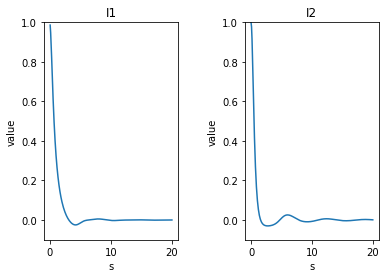

In [4]:
xs = np.linspace(0, 20, 250)
c, x = 1, 1
integral_plots(xs, c, x, -.1)

Here we observe I1 and I2 with c and x being set to 1. They have a maximum at s=0
and then it begins to dampen as we move away from 0.  
I1 which is our sine function seems to dampen a lot faster than I2, the cosine.
This may be an indicator that we may need to have a bigger upperbound for I2
to get roughly the same error as I1 when doing calculations.

Let us now start to vary c and x and see what time of result we get for I1 and I2.

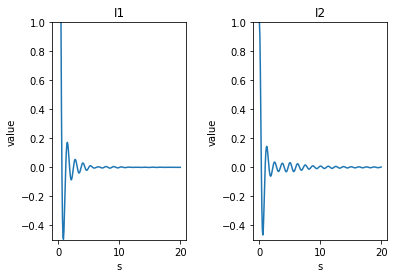

In [5]:
xs = np.linspace(0, 20, 250)
c, x = 1, 5
integral_plots(xs, c, x, -.5)

We can easily see that when we increase x while keeping c constant at 1, our integrands'
amplitudes of oscillation increase and thus, will increase the error. From this 
we should see that the error should grow from small to large or large to small.

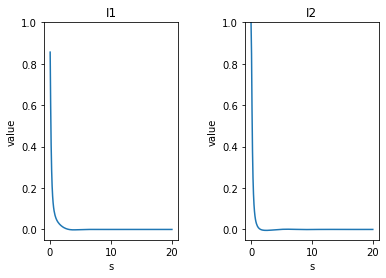

In [6]:
xs = np.linspace(0, 20, 250)
c, x = 5, 1
integral_plots(xs, c, x, -.05)

When we then increase c, I1 and I2 then dampen very quickly. With this observation,
the error when increasing c should decrease the error.

Let us now view what our functions will look like for small values of c.

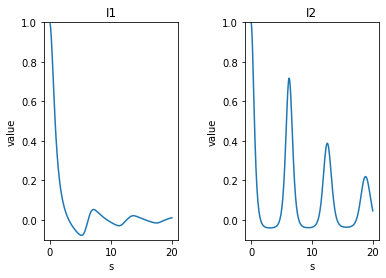

In [10]:
xs = np.linspace(0, 20, 250)
c, x = .1, 1
integral_plots(xs, c, x, -.1)

When c is set to small values such as .1, we can see that it takes much longer
for the integrands to dampen. This leads me to beleive we will have a more 
dramatic effect of $\psi$ for small values of c.

We can now visualize $\psi(x), x\in[-20, 20]$ to get a better picture 
of what to expect from our approximations.  
We will just use the basic quad method from scipy to use as visualization of $\psi$.

In [13]:
def plot_psi(xs, c, zoom_around=0):
    ys = []
    for x in xs:
        a = quad(I1, 0, np.inf, args=(c, x))
        b = quad(I2, 0, np.inf, args=(c, x))
        y = 1/2 + (1/np.pi * a[0]) + (c/np.pi * b[0])
        ys.append(y)

    _, ax = plt.subplots(1, 2)

    ax[0].plot(xs, ys)
    ax[0].set_title('psi')
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('value')

    ax[1].plot(xs, ys)
    ax[1].set_title('psi zoomed in')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('value')
    ax[1].set_xlim(zoom_around-3, zoom_around+3)

    plt.subplots_adjust(wspace=.5)
    plt.show()

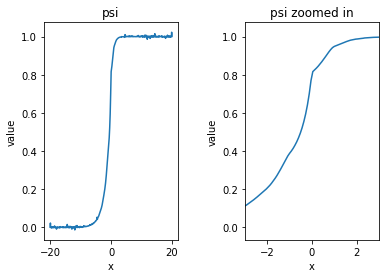

In [14]:
c = 1
xs = np.linspace(-20, 20, 500)
plot_psi(xs, c)

Viewing the plot above, we can see what the function $\psi$ looks like in the
interval $[-20, 20]$. If we look at the zoomed in figure on the right, we can 
see that there is this "steps" segment in our function. We can also observe from
the original plot that the ends seem to be quite turbulent. This aligns with the
observations we saw above when viewing I1 and I2 where with increasing x, we see
the function having more sharper frequencies. It is also important to note that
the function $\psi$ seems to be symmetrical, so we should expect results to
reflect that as well.

Let's take a closer look at the ends of our interval where there seems to be lots of noise.

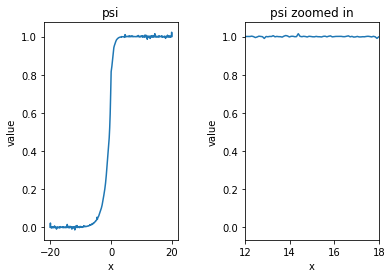

In [17]:
plot_psi(xs, c, 15)

From the plot above, we see that there is fluxuations on the ends of our function
that will cause the answer to keep changing and not converge to what we like.
This is the main reason as to why we need to stop checking certain values of x
depending on what we mark as our c value. We can do this by first plotting what
$\psi$ will look like before we begin our calculations; and when we start, adjust
our x interval to capture enough data without having to spend extra time doing 
unnessary calculations.

Let us now observe what $\psi$ will look like for small values of c.

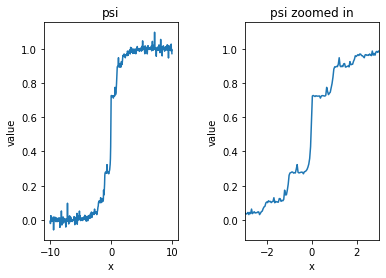

In [18]:
c = .1
xs = np.linspace(-10, 10, 500)
plot_psi(xs, c)

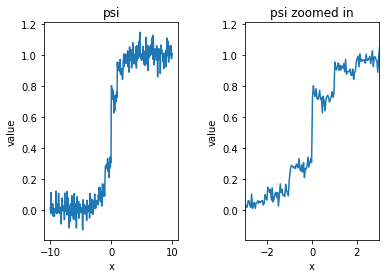

In [19]:
c = .01
xs = np.linspace(-10, 10, 500)
plot_psi(xs, c)

As c becomes small, the "steps" phenomomeon becomes more apparent in our function.
It is also observed that there is very extreme oscillations on the ends of our 
interval leading me to think that with small c values, the higher the error
of our approximations will be.

Before we begin to approximate $\psi(x)$ with our different methods, we have to
determine what is a proper interval of our integrals. From our visualisation of
$\psi(x)$ above, we know the ends of the intervals will have high error and 
plataou, so we should not include this in our calculations. Our goal is to identify
the proper region dependent on the value of c, and then run our different 
algorithsm and then compare their approximations and errors to determine which
method is best suited for this problem.

Let us now begin to analyze the different quadrature methods mentioned in the 
introduction.

First we will define the function $\psi(x)$ along with getting the errors of each
x value.

In [109]:
def get_error(f, domain, n, c, x, h_pow, const, n_pow):
    derivatives = [derivative(f, s, n=n, order=n+1, args=(c, x)) for s in domain]
    derivative_max = np.max(np.array(derivatives)[~np.isnan(derivatives)])
    error = (domain[-1] - domain[0])**h_pow / (const * len(domain)**n_pow) * derivative_max
    return error

def psi(f, c, x, I1_lim, I2_lim):
    I1_domain = np.linspace(0, I1_lim, 250)
    I2_domain = np.linspace(0, I2_lim, 250)

    I1_func_values = np.nan_to_num([I1(s, c, x) for s in I1_domain])
    I2_func_values = np.nan_to_num([I2(s, c, x) for s in I2_domain])

    I1_approx = f(I1_func_values, I1_domain)
    I2_approx = f(I2_func_values, I2_domain)

    if f == trapezoid:
        I1_error = get_error(I1, I1_domain, 2, c, x, 3, 12, 2)
        I2_error = get_error(I2, I2_domain, 2, c, x, 3, 12, 2)
    elif f == simpson:
        I1_error = get_error(I1, I1_domain, 4, c, x, 5, 180, 4)
        I2_error = get_error(I2, I2_domain, 4, c, x, 5, 180, 4)

    return 1/2 + (1/np.pi * I1_approx) + (c/np.pi * I2_approx), I1_error, I2_error

We can then create a function to return the value of $\psi$ along the xs defined
above dependent on the method we pass to it.

In [108]:
def solve(f, c, xs, lim_tol):
    x_used = []
    approximations = []
    errors = []

    for x in xs:
        I1_limit, I2_limit = get_int_lims(c, x, lim_tol)
        approx, I1_error, I2_error = psi(f, c, x, I1_limit, I2_limit)
        x_used.append(x)
        errors.append([I1_error, I2_error])
        approximations.append(approx)

    return np.array(x_used), approximations, errors

And then a helper function for when we want to visualize our results.

In [73]:
def plot_results(df):
    _, ax = plt.subplots(2, 1)

    ax[0].plot(df.x, df.approximation, label='approximation')
    ax[0].set_xlabel('x')
    ax[0].set_ylabel(r'$\psi$')

    ax[1].plot(df.x, df.I1_error, label='I1 error')
    ax[1].plot(df.x, df.I2_error, label='I2 error')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('value')

    plt.legend()

    plt.show()

Before we begin running our midpoint method, let's look to see what is a good 
endpoint for our integrand functions, because allthough we can take our integrals
to very large numbers, it may not be worth the computation because of the 
dampening effect we saw eailer. Let's check the values of what we get when 
comparing an endpoint of 100 vs 100,000.

In [55]:
c, x = 1, 1
print('I1 to 100:\t', quad(I1, 0, 100, args=(c, x))[0])
print('I1 to 100,000:\t', quad(I1, 0, 100_000, args=(c, x))[0])
print('I2 to 100:\t', quad(I2, 0, 100, args=(c, x))[0])
print('I2 to 100,000:\t', quad(I2, 0, 100_000, args=(c, x))[0])

I1 to 100:	 0.8800460955407019
I1 to 100,000:	 0.8800509192249834
I2 to 100:	 0.5273718177989272
I2 to 100,000:	 0.5118353236057749


We can see that for I1, we can see that the integral bounded to 100 is very close
to the integral bounded to 100,000. For I2, this is not the case and we will have
to consider a larger limit of integration. Let's write a function that will tell
us a good cutoff value for both I1 and I2's limits of integration such that the 
value of the next iteration has a difference of $10^{-4}$.

In [58]:
def get_int_lims(c, x, tol):
    I1_prev, I2_prev = 0, 0
    I1_lim, I2_lim = 0, 0
    for i in range(1, 1_000_001):
        if I1_lim and I2_lim: break

        I1_val, _ = quad(I1, 0, i, args=(c, x))
        I2_val, _ = quad(I2, 0, i, args=(c, x))

        if not I1_lim and np.abs(I1_val - I1_prev) <= tol: I1_lim = i
        if not I2_lim and np.abs(I2_val - I2_prev) <= tol: I2_lim = i

        if not I1_lim: I1_prev = I1_val
        if not I2_lim: I2_prev = I2_val

    return I1_lim, I2_lim

get_int_lims(1, 1, 1e-4)

(13, 43)

In the example above with having c=1, x=1, and a tolerence of $10^{-4}$, we get
our limits of integration to be 13 and 43 for I1 and I2 respectivly. This function 
necessary to have so that we do not cut our calculations short, nor do we make 
unnessary calculations cusing our runtime to be longer.

### Midpoint

First thing we want to do as stated above is view what $\psi$ will look like 
for a certain value of c. Let's pick c=1 to start.

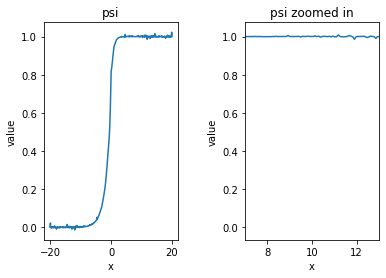

In [62]:
plot_psi(np.linspace(-20, 20, 250), 1, 10)

From the plot above, let's use the x interval of $[-10, 10]$.

In [65]:
def midpoint(f, x, c, lim):
    domain = np.linspace(0, lim, 250)
    error = get_error(f, domain, 2, c, x, 3, 24, 2)

    a, b, n = 0, lim, lim

    h = (b - a) / n
    result = 0
    for i in range(n):
        result += f((a + h / 2) + i * h, c, x)
    result *= h

    return result, error

def solve_midpoint(c, xs, lim_tol):
    x_used = []
    approximations = []
    errors = []

    for x in xs:
        I1_limit, I2_limit = get_int_lims(c, x, lim_tol)
        I1_approx, I1_error = midpoint(I1, x, c, I1_limit)
        I2_approx, I2_error = midpoint(I2, x, c, I2_limit)
        approx = 1/2 + (1/np.pi * I1_approx) + (c/np.pi * I2_approx)
        x_used.append(x)
        errors.append([I1_error, I2_error])
        approximations.append(approx)

    return x_used, approximations, errors

In [133]:
x_used, approximations, errors = solve_midpoint(1, np.arange(-10, 11), 1e-4)

In [134]:
middf = pd.DataFrame({
    'x': x_used,
    'approximation': approximations,
    'I1_error': np.array(errors)[:,0],
    'I2_error': np.array(errors)[:,1],
    'error': np.array(errors)[:,0] + np.array(errors)[:,1]
})
middf

,x,approximation,I1_error,I2_error,error
0,-10,0.922671,0.028348,0.006177,0.034526
1,-9,0.866946,0.019610,0.014983,0.034593
2,-8,0.759156,0.021536,0.004050,0.025586
3,-7,0.567479,0.006465,0.004933,0.011398
4,-6,0.176659,0.002780,0.001162,0.003942
5,-5,0.072177,0.000897,0.010505,0.011401
6,-4,0.068964,0.027557,0.015873,0.043431
7,-3,0.112136,0.010618,0.010530,0.021148
8,-2,0.202458,0.004718,0.003776,0.008493
9,-1,0.380060,0.001900,0.040725,0.042624


We can see that for I1, we can see that the integral bounded to 100 is very close
to the integral bounded to 100,000. For I2, this is not the case and we will have
to consider a larger limit of integration. Let's write a function that will tell
us a good cutoff value for both I1 and I2's limits of integration such that the 
value of the next iteration has a difference of $10^{-4}$.

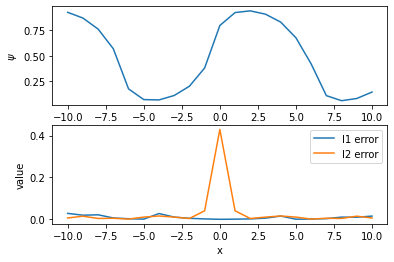

In [74]:
plot_results(middf)

In the top plot, we have our approximations for the value of $\psi$ over $x\in[-10, 10]$.
The values also seem to be oscillating which should be apparent from the trig functions
embedded in $\psi$.  
It is also important to note the large error spike of I2 around 0. If we take a 
look back at what I2 is:
$$\frac{cos(sx)}{A(s)^2 + c^2s^2}$$
We see that $cos(0)=1$ which is at it's maximum with a large amplitude.

Let's view our results for midpoint with small values of c.

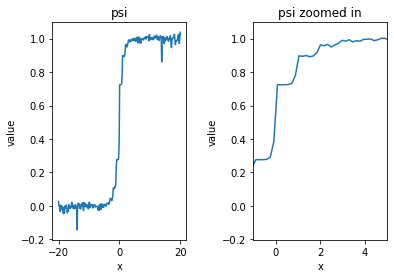

In [78]:
plot_psi(np.linspace(-20, 20, 250), .1, 2)

From the plot above, let's use the x interval from $[-5, 5]$.

In [79]:
x_used, approximations, errors = solve_midpoint(.1, np.arange(-5, 6), 1e-4)

In [80]:
middf = pd.DataFrame({
    'x': x_used,
    'approximation': approximations,
    'I1_error': np.array(errors)[:,0],
    'I2_error': np.array(errors)[:,1],
    'error': np.array(errors)[:,0] + np.array(errors)[:,1]
})
middf

,x,approximation,I1_error,I2_error,error
0,-5,0.110900,0.328809,0.764696,1.093505
1,-4,0.055288,0.487545,0.104915,0.592460
2,-3,0.055540,0.543579,2.475214,3.018793
3,-2,0.111207,0.323775,14.431096,14.754871
4,-1,0.277985,0.120910,1.797297,1.918207
5,0,0.718465,0.000000,22.235805,22.235805
6,1,0.890353,0.046591,1.797297,1.843888
7,2,0.951105,0.159058,14.431096,14.590154
8,3,0.964770,0.340454,2.475214,2.815668
9,4,0.947521,0.308189,0.104915,0.413104


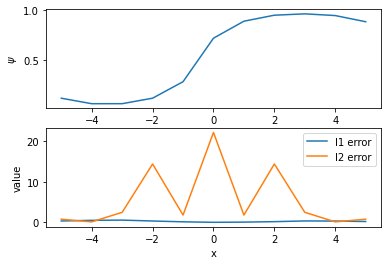

In [81]:
plot_results(middf)

As expected in our hypotheis, the overall error is much larger when c is small.

### Trapezoid

From above when plotting $\psi$ to determine our bounds for x when c=1, we got
that a good domain for that is $[-10, 10]$.

In [135]:
x_used, approximations, errors = solve(trapezoid, 1, np.arange(-10, 11), 1e-4)

In [136]:
trapdf = pd.DataFrame({
    'x': x_used,
    'approximation': approximations,
    'I1_error': np.array(errors)[:,0],
    'I2_error': np.array(errors)[:,1],
    'error': np.array(errors)[:,0] + np.array(errors)[:,1]
})
trapdf

,x,approximation,I1_error,I2_error,error
0,-10,0.084669,0.056697,0.012355,0.069052
1,-9,0.071877,0.039220,0.029966,0.069186
2,-8,0.071824,0.043071,0.008100,0.051171
3,-7,0.050327,0.012930,0.009865,0.022796
4,-6,0.044907,0.005560,0.002323,0.007883
5,-5,0.049962,0.001793,0.021009,0.022802
6,-4,0.104579,0.055114,0.031747,0.086861
7,-3,0.139236,0.021236,0.021059,0.042296
8,-2,0.222844,0.009436,0.007551,0.016987
9,-1,0.396250,0.003799,0.081449,0.085249


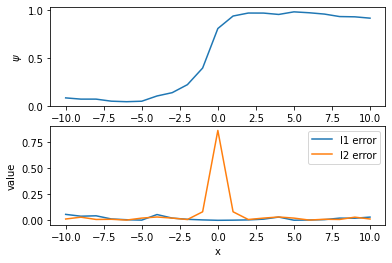

In [112]:
plot_results(trapdf)

From the above we see that we get similar results to the midpoint rule, however
one big thing to notice is that the runtime for trapezoid was much faster. So as
of now, trapezoid is our best method.

Let's also look at small value of c using the trapezoid method. Also from above,
we found that for c=.1, we can restrict our domain to $[-5, 5]$.

In [113]:
x_used, approximations, errors = solve(trapezoid, .1, np.arange(-5, 6), 1e-4)

In [114]:
trapdf = pd.DataFrame({
    'x': x_used,
    'approximation': approximations,
    'I1_error': np.array(errors)[:,0],
    'I2_error': np.array(errors)[:,1],
    'error': np.array(errors)[:,0] + np.array(errors)[:,1]
})
trapdf

,x,approximation,I1_error,I2_error,error
0,-5,0.124045,0.657617,1.529393,2.187010
1,-4,0.132906,0.975090,0.209830,1.184920
2,-3,0.146080,1.087157,4.950428,6.037586
3,-2,0.183371,0.647551,28.862192,29.509742
4,-1,0.312933,0.241819,3.594594,3.836414
5,0,0.750816,0.000000,44.471611,44.471611
6,1,0.857452,0.093182,3.594594,3.687777
7,2,0.891664,0.318116,28.862192,29.180307
8,3,0.879390,0.680908,4.950428,5.631336
9,4,0.876479,0.616379,0.209830,0.826209


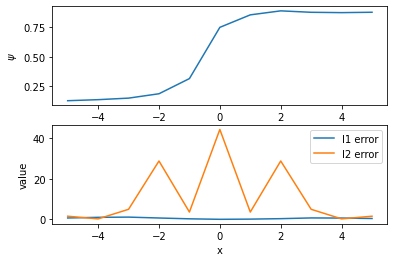

In [115]:
plot_results(trapdf)

Again, our results are very similar to the midpoint rule and like before, the
error is higher with lower values of c.

### Simpson

In [137]:
x_used, approximations, errors = solve(simpson, 1, np.arange(-10, 11), 1e-4)

In [138]:
simpdf = pd.DataFrame({
    'x': x_used,
    'approximation': approximations,
    'I1_error': np.array(errors)[:,0],
    'I2_error': np.array(errors)[:,1],
    'error': np.array(errors)[:,0] + np.array(errors)[:,1]
})
simpdf

,x,approximation,I1_error,I2_error,error
0,-10,0.071087,2.207068e-05,0.000015,0.000037
1,-9,0.059938,1.225890e-05,0.000070,0.000082
2,-8,0.060886,1.533649e-05,0.000009,0.000025
3,-7,0.043346,2.229216e-06,0.000022,0.000024
4,-6,0.040365,5.918605e-07,0.000003,0.000004
5,-5,0.046860,1.004550e-07,0.000092,0.000092
6,-4,0.097172,3.752050e-05,0.000120,0.000158
7,-3,0.134677,8.982611e-06,0.000057,0.000066
8,-2,0.220053,2.815576e-06,0.000013,0.000016
9,-1,0.394431,1.068670e-06,0.001052,0.001053


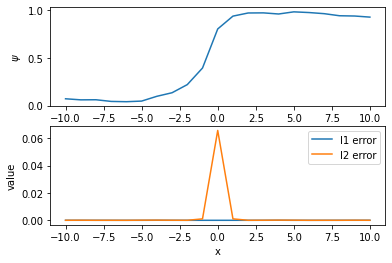

In [118]:
plot_results(simpdf)

Observing the table as a result of Simpson's method, we can see that the error
is very small compared to the midpoint and trapezoid methods. Although this 
result took longer, in my opinion, the little extra time it took to compute the 
results are worth it for the substantial decrease in the error.

Again, let's see what happens with Simpson's rule for small values of c.

In [121]:
x_used, approximations, errors = solve(simpson, .1, np.arange(-5, 6), 1e-4)

In [122]:
simpdf = pd.DataFrame({
    'x': x_used,
    'approximation': approximations,
    'I1_error': np.array(errors)[:,0],
    'I2_error': np.array(errors)[:,1],
    'error': np.array(errors)[:,0] + np.array(errors)[:,1]
})
simpdf

,x,approximation,I1_error,I2_error,error
0,-5,0.104898,0.002243,0.105158,0.107400
1,-4,0.115466,0.005443,0.002680,0.008123
2,-3,0.128607,0.008478,1.087238,1.095716
3,-2,0.169100,0.004121,11.961265,11.965386
4,-1,0.306256,0.001347,0.627216,0.628564
5,0,0.743345,0.000000,1178.595415,1178.595415
6,1,0.862209,0.001951,0.627216,0.629167
7,2,0.899665,0.005694,11.961265,11.966959
8,3,0.893028,0.010164,1.087238,1.097402
9,4,0.893580,0.006797,0.002680,0.009477


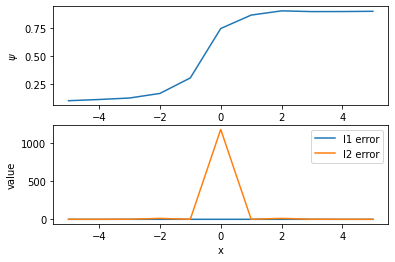

In [124]:
plot_results(simpdf)

For small values of c, it appears that Simpson's rule is not that much better,
and even worse than the midpoint and trapezoidal rules.

# Results

Let us first compare our approximated results to our plot eailer of $\psi$.

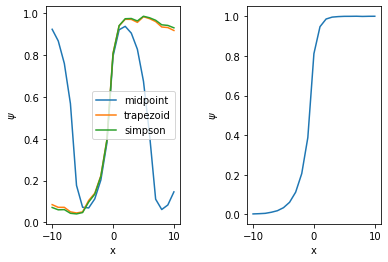

In [142]:
_, ax = plt.subplots(1, 2)
ax[0].plot(middf.x, middf.approximation, label='midpoint')
ax[0].plot(trapdf.x, trapdf.approximation, label='trapezoid')
ax[0].plot(simpdf.x, simpdf.approximation, label='simpson')
ax[0].set_xlabel('x')
ax[0].set_ylabel(r'$\psi$')
ax[0].legend()

psi_ys = []
for x in np.arange(-10, 11):
    a = quad(I1, 0, np.inf, args=(1, x))
    b = quad(I2, 0, np.inf, args=(1, x))
    y = 1/2 + (1/np.pi * a[0]) + (1/np.pi * b[0])
    psi_ys.append(y)
ax[1].plot(np.arange(-10, 11), psi_ys)
ax[1].set_xlabel('x')
ax[1].set_ylabel(r'$\psi$')

plt.subplots_adjust(wspace=.5)
plt.show()

From the compairson above, we can see that midpoint does horribly for this problem.
Going forward in our results, we will not consider the midpoint rule for deciding
which method is best for approximating $\psi$.

Let's see how long it takes to run each of our methods from $[-10, 10]$.

In [131]:
# trapezoid
%timeit solve(trapezoid, 1, np.arange(-10, 11), 1e-4)

3.69 s ± 71.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [132]:
# simpson
%timeit solve(simpson, 1, np.arange(-10, 11), 1e-4)

7.72 s ± 1.09 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


From our results it is clear that trapezoid is the fastest and simpson being 
about 2x as long computation time as trapezoid. This falls inline with the 
introductory hypothesis as the trapezoid is much faster to solve.  
Let's also test the other part of our hypothesis: simpson will have less error
than trapezoid.

In [147]:
print('Trapezoid error mean:', trapdf.error.mean())
print('Simpson error mean:', simpdf.error.mean())

Trapezoid error mean: 0.08036162977475625
Simpson error mean: 0.003281651394950919


From the results above, we see that, on average, Simpson has a 184.306% error 
difference from trapezoid. It is also important to note the percent difference
from the time inspection was 70.6398%.


We can also inspect the statistics of both dataframes.

In [151]:
trapdf.describe()

,x,approximation,I1_error,I2_error,error
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.000000,0.551331,0.017995,0.062367,0.080362
std,6.204837,0.425670,0.018062,0.183788,0.180290
min,-10.000000,0.044907,0.000000,0.002323,0.005201
25%,-5.000000,0.084669,0.003799,0.008100,0.021975
50%,0.000000,0.808853,0.010981,0.021009,0.042296
75%,5.000000,0.955720,0.030682,0.029966,0.069052
max,10.000000,0.982807,0.056697,0.858857,0.858857


In [152]:
simpdf.describe()

,x,approximation,I1_error,I2_error,error
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.000000,0.550839,0.000012,0.003270,0.003282
std,6.204837,0.432035,0.000014,0.014321,0.014318
min,-10.000000,0.040365,0.000000,0.000003,0.000004
25%,-5.000000,0.071087,0.000001,0.000013,0.000025
50%,0.000000,0.805194,0.000005,0.000057,0.000066
75%,5.000000,0.962490,0.000018,0.000092,0.000092
max,10.000000,0.985015,0.000053,0.065757,0.065757


# Conclusion